
Clustering and hierarchical clustering are both unsupervised learning techniques used to group similar data points together based on certain characteristics or patterns. However, they differ in approach and use cases.

# 1. Clustering

Clustering is the process of dividing a dataset into distinct groups, or clusters, where data points in the same cluster are more similar to each other than to those in other clusters.

**Popular Methods:**

1. **K-means**: Partitions data into K clusters by minimizing the variance within each cluster.
2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups data points based on density, which helps detect clusters of varying shapes and sizes. Also identifies outliers as noise.
3. **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions and clusters by maximizing the likelihood of the data given these distributions.

**When to Use:** Clustering is useful for finding patterns in data when there are no predefined labels. It’s used in customer segmentation, image compression, and document clustering, among other applications.

**Limitations:** Many clustering methods, like K-means, struggle with clusters that are non-spherical or vary in density and size. Additionally, choosing the right number of clusters can be challenging.

# Importing Libraries and Mounting

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Lab/Week 12/IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**Normalization**

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
numeric_columns = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

# Iterate over each column in the DataFrame
for col in numeric_columns:
  try:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))
  except:
    pass

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your Iris DataFrame
# Update numeric_columns to reflect the actual numerical columns in your DataFrame
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


# Clustering

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(df[numeric_columns])

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = clusters

# Analyze the results (e.g., count the number of points in each cluster)
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
0    150
Name: count, dtype: int64


In [20]:
!pip install hdbscan

In [21]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # Adjust min_cluster_size as needed
clusterer.fit(df[numeric_columns])
df['HDBSCAN_cluster'] = clusterer.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,DBSCAN_Cluster,HDBSCAN_cluster
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,0,1
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,0,1
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,0,1
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,0,1


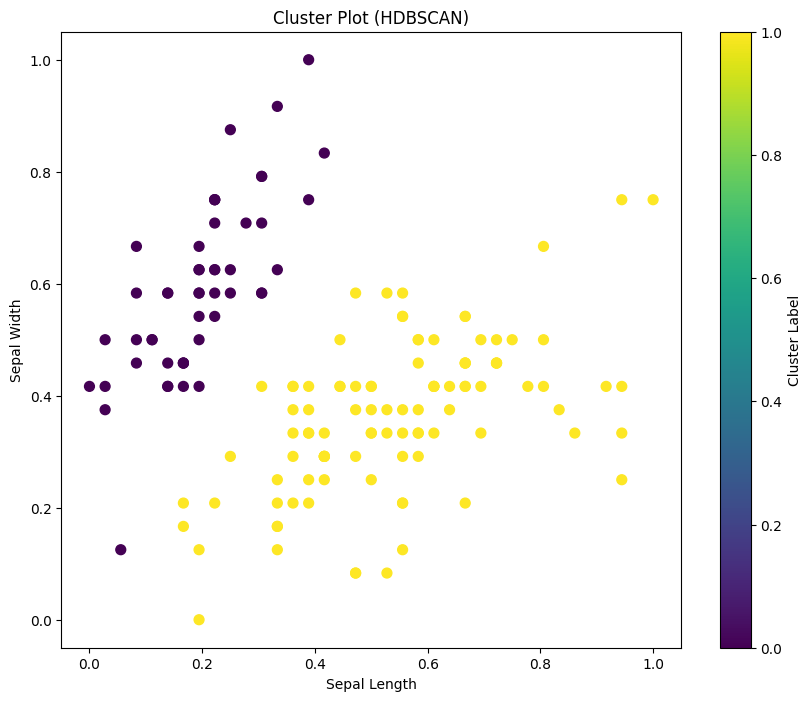

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
# Change the columns to the ones that exist in your DataFrame
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['HDBSCAN_cluster'], cmap='viridis', s=50)
plt.xlabel('Sepal Length')  # Update x-axis label
plt.ylabel('Sepal Width')  # Update y-axis label
plt.title('Cluster Plot (HDBSCAN)')
plt.colorbar(label='Cluster Label')
plt.show()

In [24]:
unique_hdb_clusters = df['HDBSCAN_cluster'].unique()
unique_hdb_clusters

array([0, 1])

In [25]:
cluster_groups = df.groupby('HDBSCAN_cluster')

# Iterate through each cluster and print the countries
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    countries = cluster_data['Country'].tolist()
    print(countries)
    print()

Cluster 0:


KeyError: 'Country'

In [26]:
#suggested by ai
cluster_groups = df.groupby('HDBSCAN_cluster')

# Iterate through each cluster and print some relevant information
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    # Print the first 5 rows of data for this cluster
    print(cluster_data.head())
    print()
    # To print specific information like mean sepal length:
    # print(f"Mean Sepal Length: {cluster_data['sepal_length'].mean()}")
    # print()

Cluster 0:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0      0.222222     0.625000      0.067797     0.041667  Iris-setosa   
1      0.166667     0.416667      0.067797     0.041667  Iris-setosa   
2      0.111111     0.500000      0.050847     0.041667  Iris-setosa   
3      0.083333     0.458333      0.084746     0.041667  Iris-setosa   
4      0.194444     0.666667      0.067797     0.041667  Iris-setosa   

   DBSCAN_Cluster  HDBSCAN_cluster  
0               0                0  
1               0                0  
2               0                0  
3               0                0  
4               0                0  

Cluster 1:
    sepal_length  sepal_width  petal_length  petal_width          species  \
50      0.750000     0.500000      0.627119     0.541667  Iris-versicolor   
51      0.583333     0.500000      0.593220     0.583333  Iris-versicolor   
52      0.722222     0.458333      0.661017     0.583333  Iris-versicolor   
53      0.3333

In [31]:
# prompt: do kmeans clsutering

from sklearn.cluster import KMeans

# Assuming df and numeric_columns are defined as in the provided code

# Choose the number of clusters (k)
k = 3  # You can experiment with different values of k

# Create a KMeans object
kmeans = KMeans(n_clusters=k, random_state=0)  # random_state for reproducibility

# Fit the KMeans model to your data
kmeans.fit(df[numeric_columns])

# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans.labels_

# Print the cluster assignments
print(df['KMeans_Cluster'].value_counts())

# You can further analyze the clusters by examining the characteristics of data points within each cluster,
# e.g., calculate cluster means, visualize the clusters, etc.

KMeans_Cluster
0    61
1    50
2    39
Name: count, dtype: int64


KMeans_Cluster
0    61
1    50
2    39
Name: count, dtype: int64


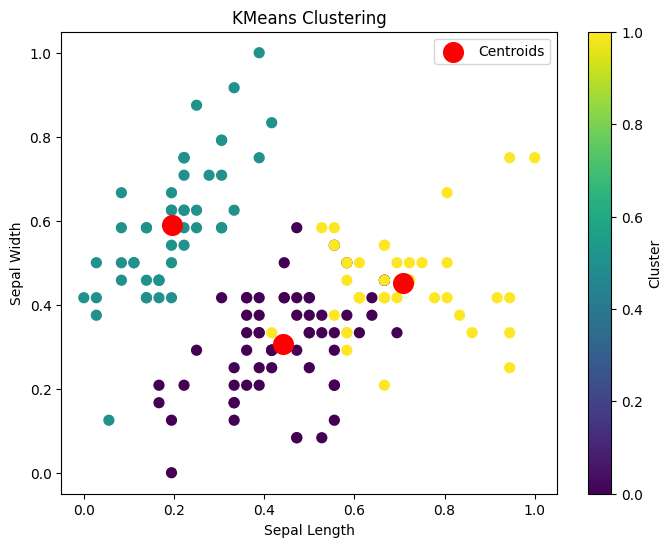

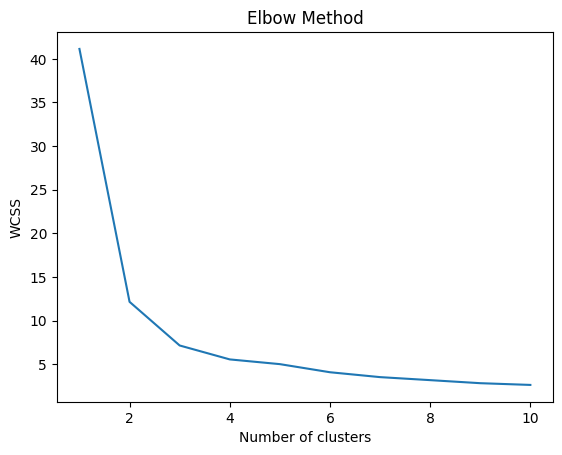

In [29]:
# prompt: show me the details of k means with proper graph

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df and numeric_columns are defined as in the provided code
# Choose the number of clusters (k)
k = 3  # You can experiment with different values of k

# Create a KMeans object
kmeans = KMeans(n_clusters=k, random_state=0)  # random_state for reproducibility

# Fit the KMeans model to your data
kmeans.fit(df[numeric_columns])

# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans.labels_

# Print the cluster assignments
print(df['KMeans_Cluster'].value_counts())

# Visualize the clusters (example using sepal length and sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

#Inertia Plot to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[numeric_columns])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

DBSCAN Cluster Counts:
 DBSCAN_Cluster
0    150
Name: count, dtype: int64

HDBSCAN Cluster Counts:
 HDBSCAN_cluster
1    100
0     50
Name: count, dtype: int64


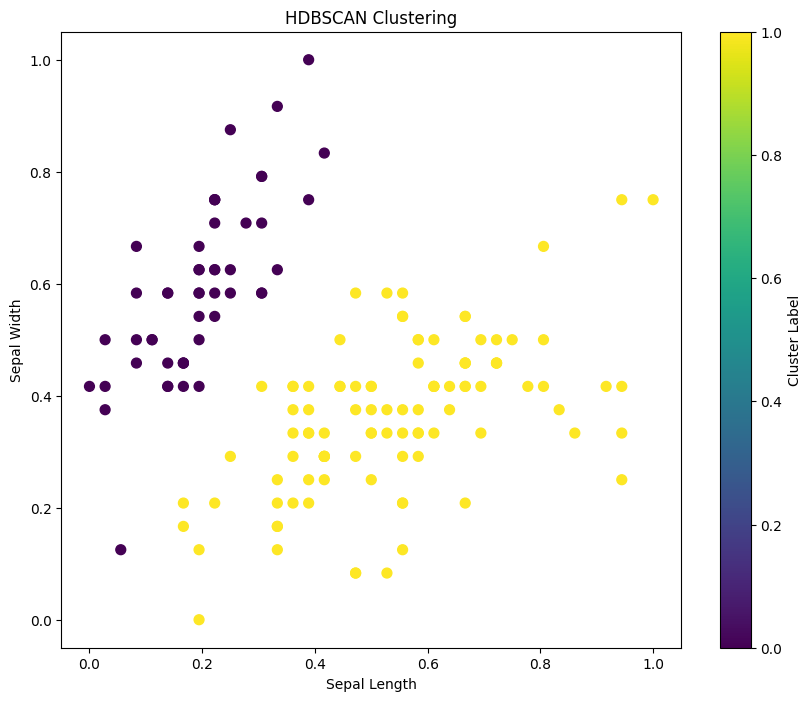

In [32]:
# prompt: is it possible to ger 3 cluster in BDSCAN and HDBSCAN clustering

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import hdbscan
import matplotlib.pyplot as plt


# ... (Your existing code for data loading and preprocessing) ...


# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[numeric_columns])
print("DBSCAN Cluster Counts:\n", df['DBSCAN_Cluster'].value_counts())


# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5) # Adjust min_cluster_size and min_samples
clusterer.fit(df[numeric_columns])
df['HDBSCAN_cluster'] = clusterer.labels_

#Analyze the results.
print("\nHDBSCAN Cluster Counts:\n", df['HDBSCAN_cluster'].value_counts())

#Now you can see the number of data points in each cluster for both algorithms.
#You can further analyze or visualize these results to see if you get the desired 3 clusters.

#Example Visualization for HDBSCAN (adjust as needed)
plt.figure(figsize=(10, 8))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['HDBSCAN_cluster'], cmap='viridis', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('HDBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


do k means, dbscan and hdbcan

Transfer learning